### 11. Muestreo / Sobre muestreo / Submuestreo 
     Regresión Logística
     
     
- El ejercicio se realizó utilizando el dataset de atletas para determinar si la disciplina de una atleta femenina era: **"Weightlifting"** o **"Gymnastics"**, en función de su edad, peso y altura. Así también, el desbalance en los datos se presenta tal que las deportistas de Weightlifting tienen menor cantidad de registros.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión """

    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)

    #Código de matplotlib para graficar
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz,
                          columns=["0 : Weightlifting", "1 : Gymnastics"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")
    plt.show()

In [3]:
path_atletas = r"athlete.csv"
df_atletas = pd.read_csv(path_atletas)

In [4]:
df_atletas_complete = df_atletas.dropna()

In [5]:
df_femenino = df_atletas_complete[df_atletas_complete['Sex'] == 'F']
df_femenino_summer = df_femenino[df_femenino['Season'] == 'Summer']
sports = ['Weightlifting','Gymnastics']
df_femenino_summer_sports = df_femenino_summer[df_femenino_summer['Sport'].isin(sports)]

In [6]:
df_femenino_summer_sports = df_femenino_summer_sports[['Age', 'Height', 'Weight','Sport']]

df_femenino_summer_sports.replace('Weightlifting', 0, inplace=True)
df_femenino_summer_sports.replace('Gymnastics', 1, inplace=True)

In [7]:
prueba=df_femenino_summer_sports.sample(n=100,random_state=1)

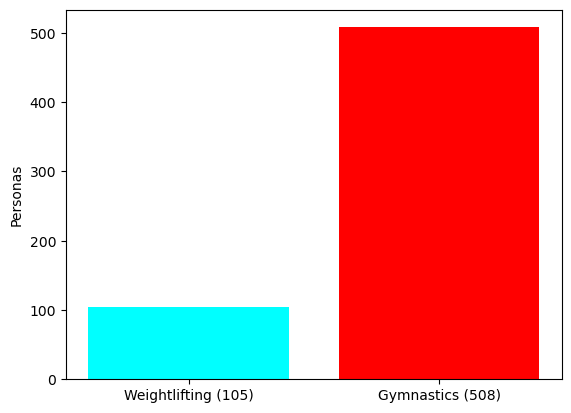

In [11]:
num_weightlifting = df_femenino_summer_sports[df_femenino_summer_sports['Sport']==0].shape[0]
num_gymnastics    = df_femenino_summer_sports[df_femenino_summer_sports['Sport']==1].shape[0]


plt.bar(["Weightlifting (%d)" % num_weightlifting,"Gymnastics (%d)" %  num_gymnastics],[num_weightlifting,num_gymnastics],color=["cyan","red"],width=0.8)

plt.ylabel("Personas")
plt.show()

In [12]:
data_weightlifting = df_femenino_summer_sports[df_femenino_summer_sports['Sport']==0]
data_gymnastics    = df_femenino_summer_sports[df_femenino_summer_sports['Sport']==1]

In [13]:
sobre_muestreo_data_weightlifting=pd.DataFrame(data_weightlifting.sample(n=num_gymnastics,replace=True,random_state=0))
sobre_muestreo_data_weightlifting

,Age,Height,Weight,Sport
140543,25.0,160.0,69.0,0
148268,26.0,161.0,63.0,0
191617,31.0,164.0,67.5,0
200840,19.0,162.0,75.0,0
200840,19.0,162.0,75.0,0
...,...,...,...,...
99899,25.0,160.0,53.0,0
206094,19.0,149.0,53.0,0
40669,22.0,159.0,63.0,0
180366,23.0,155.0,63.0,0


In [14]:
sub_muestreo_gymnastics=pd.DataFrame(data_gymnastics.sample(n=num_weightlifting,replace=True,random_state=0))
sub_muestreo_gymnastics

,Age,Height,Weight,Sport
109707,16.0,145.0,41.0,1
32059,19.0,162.0,48.0,1
80497,15.0,148.0,33.0,1
118898,22.0,152.0,47.0,1
167645,15.0,145.0,40.0,1
...,...,...,...,...
50066,15.0,158.0,54.0,1
124204,17.0,152.0,39.0,1
167831,21.0,158.0,50.0,1
141303,17.0,141.0,40.0,1


In [15]:
sobremuestreo=pd.concat([sobre_muestreo_data_weightlifting,data_gymnastics])
datos_sobremuestreo=sobremuestreo.iloc[:,:-1]
clase_sobremuestreo=sobremuestreo.iloc[:,-1:]


submuestreo=pd.concat([data_weightlifting,sub_muestreo_gymnastics])
datos_submuestreo=submuestreo.iloc[:,:-1]
clase_submuestreo=submuestreo.iloc[:,-1:]

desbalanceado=pd.DataFrame(pd.concat([data_weightlifting,data_gymnastics]))
datos_desbalanceado=desbalanceado.iloc[:,:-1]
clase_desbalanceado=desbalanceado.iloc[:,-1:]


# datos para probar el modelo

datos_prueba = prueba.iloc[:,:-1]
clase_prueba = prueba.iloc[:,-1:]

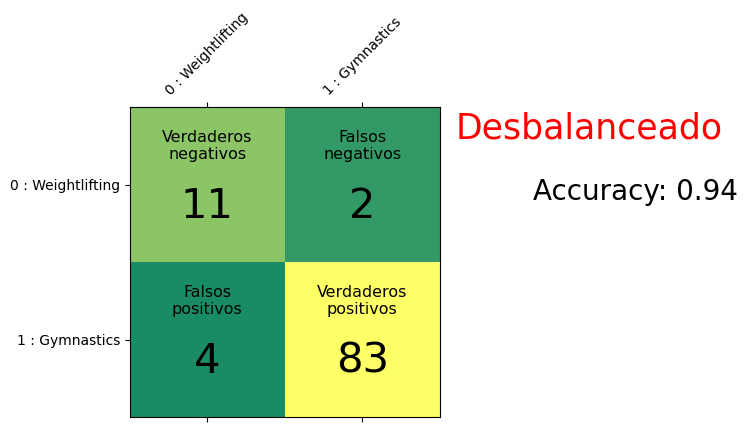

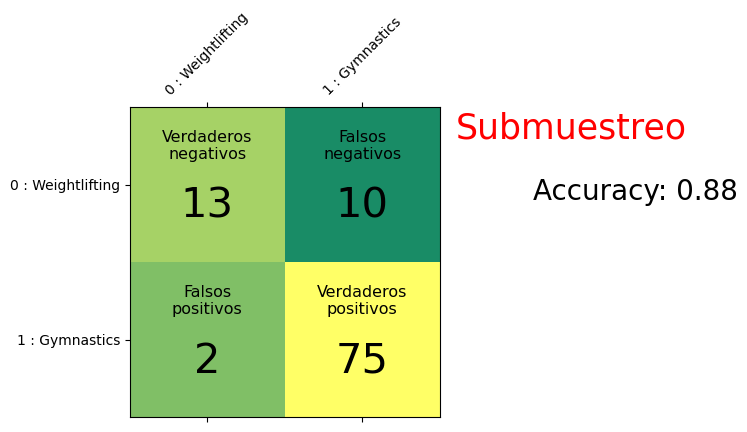

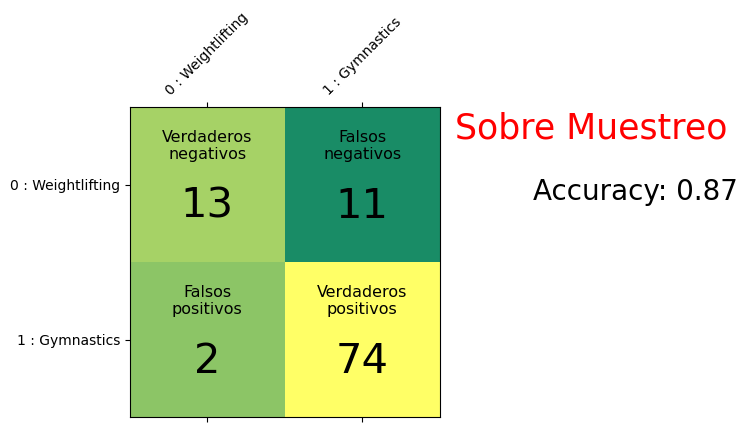

In [16]:
modelo = LogisticRegression().fit(datos_desbalanceado.values,clase_desbalanceado.values.reshape(-1))
matriz_de_confusion(clase_prueba.values,modelo.predict(datos_prueba.values),"Desbalanceado")


modelo = LogisticRegression().fit(datos_submuestreo.values,clase_submuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values,modelo.predict(datos_prueba.values),"Submuestreo")

modelo = LogisticRegression().fit(datos_sobremuestreo.values,clase_sobremuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values,modelo.predict(datos_prueba.values),"Sobre Muestreo")



### D11. Discusión de los resultados

Los resultados al realizar el sub o sobre muestreo, no difieren en gran medida, tan solo a un falso negativo de una atleta weightlifting. Sin embargo, la diferencia es importante al realizar la clasificación con los datos desbalanceados, ya que si bien el accuracy incrementa significativamente a 0.94, los Falsos positivos incrementan de 4, en comparación al submuestreo o sobremuestreo.